# Trabalho 2

## 4.2.1 Redes Neuronais

Neste notebook está o código relacionado com as Redes Neuronais na sua utilização para classificação.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras, random
from keras_visualizer import visualizer

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
# Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
plt.style.use("style/estilo.mplstyle")
# plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [5]:
ut.titulo("Valores codificados por atributo")

# for coluna in colunas_classes_binarias:
for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]


?? Para colunas que têm mais que 2 classes precisamos de utilizar o ``pandas.get_dummies()``.

In [6]:
# dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)

In [7]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,Peso_Normal,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,Peso_Normal,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,Peso_Normal,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,Excesso_Peso_Grau_I,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,Obesidade_Mórbida,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,Obesidade_Mórbida,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,Obesidade_Mórbida,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,Obesidade_Mórbida,44.071535


## Holdout

divide o dataset em target(y) e feature(x)

In [8]:
y = dados_trabalho.loc[:, "Label"].values
X = dados_trabalho.drop(["Label"], axis=1).values

### Codificação

Utilizar o ``sklearn.preprocessing.labelEncoder()`` no y

In [9]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### Divisão dos dados em treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape

((1477, 15), (634, 15))

## Redes neuronais

### Parametrização

Estes valores podem ser ajustados, com base nos gráficos de overfitting.

In [11]:
random.set_seed(3)
nr_colunas = 15

### Pré processamento dos dados

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((1477, 15), (634, 15))

### Modelo 

Escolhi usar softmax em vez de sigmoid porque temos várias classes (9) na coluna de target.


In [14]:
model = keras.Sequential([
    keras.Input(shape=(nr_colunas,)),
    keras.layers.Dense(3, activation="relu"),

    keras.layers.Dense(9, activation="softmax"),
])

### Treino do modelo

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Resumo do modelo

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

### VIsualizer

In [17]:
visualizer(
    model,
    file_format='jpeg',
    view=True,
    settings=None
)

### Histórico

In [18]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1427 - loss: 2.2098 - val_accuracy: 0.1689 - val_loss: 2.2051
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1415 - loss: 2.1530 - val_accuracy: 0.1959 - val_loss: 2.1526
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1524 - loss: 2.1088 - val_accuracy: 0.2162 - val_loss: 2.1098
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 2.0717 - val_accuracy: 0.2365 - val_loss: 2.0727
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1753 - loss: 2.0392 - val_accuracy: 0.2365 - val_loss: 2.0397
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1960 - loss: 2.0093 - val_accuracy: 0.3378 - val_loss: 2.0091
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2882 - loss: 1.9811 - val_accuracy: 0.3649 - val_loss: 1.9811
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3100 - loss: 1.9528 - val_accuracy: 0.3649 - val_loss:

### Gráficos

#### Model Loss

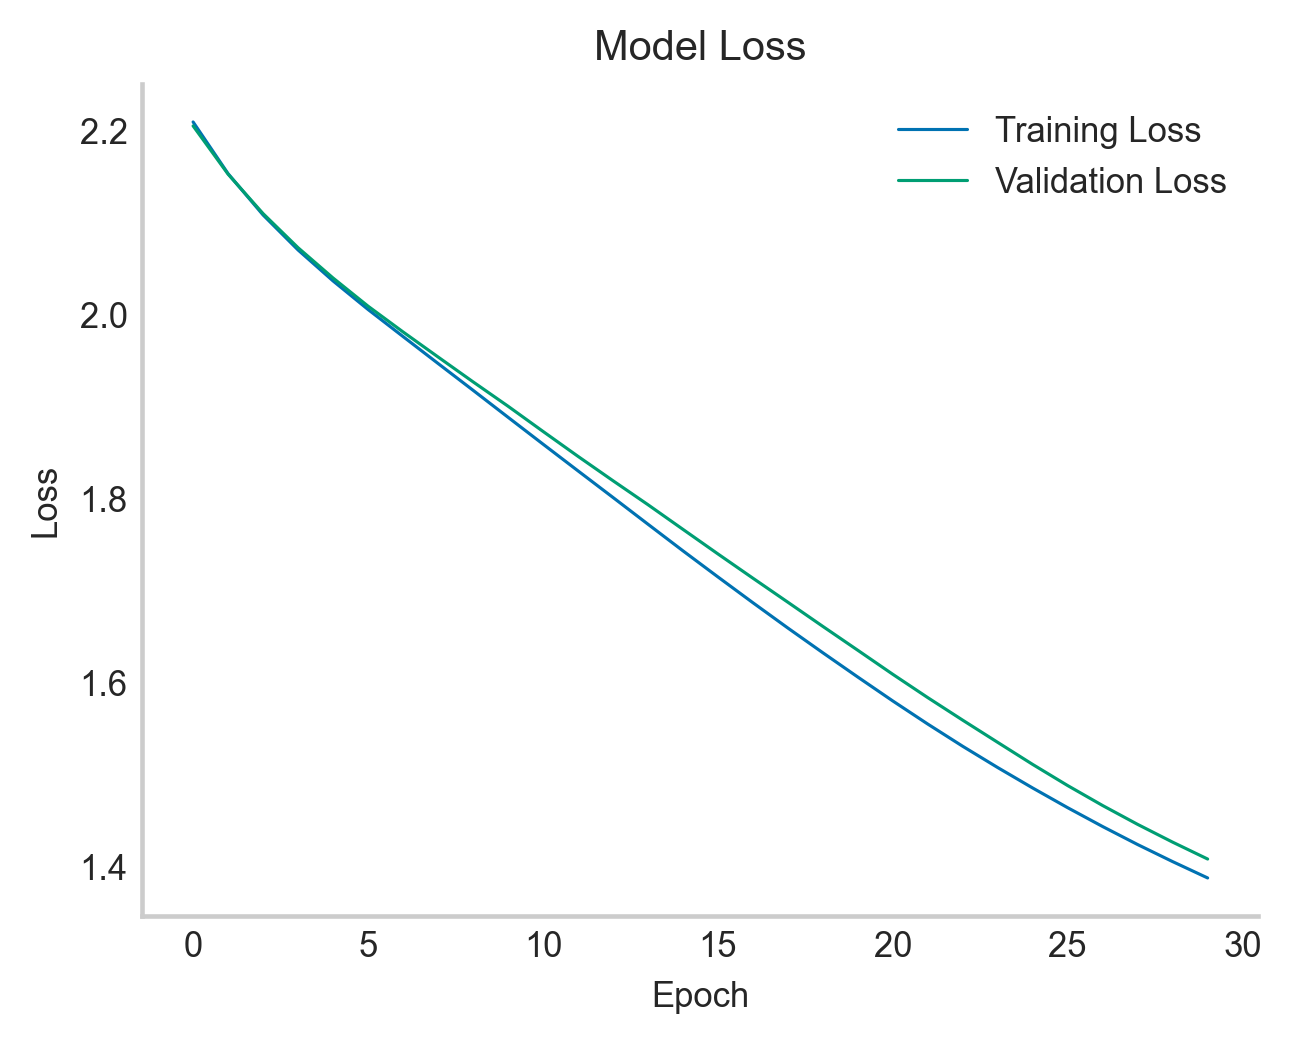

In [19]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()


#### Model Accuracy

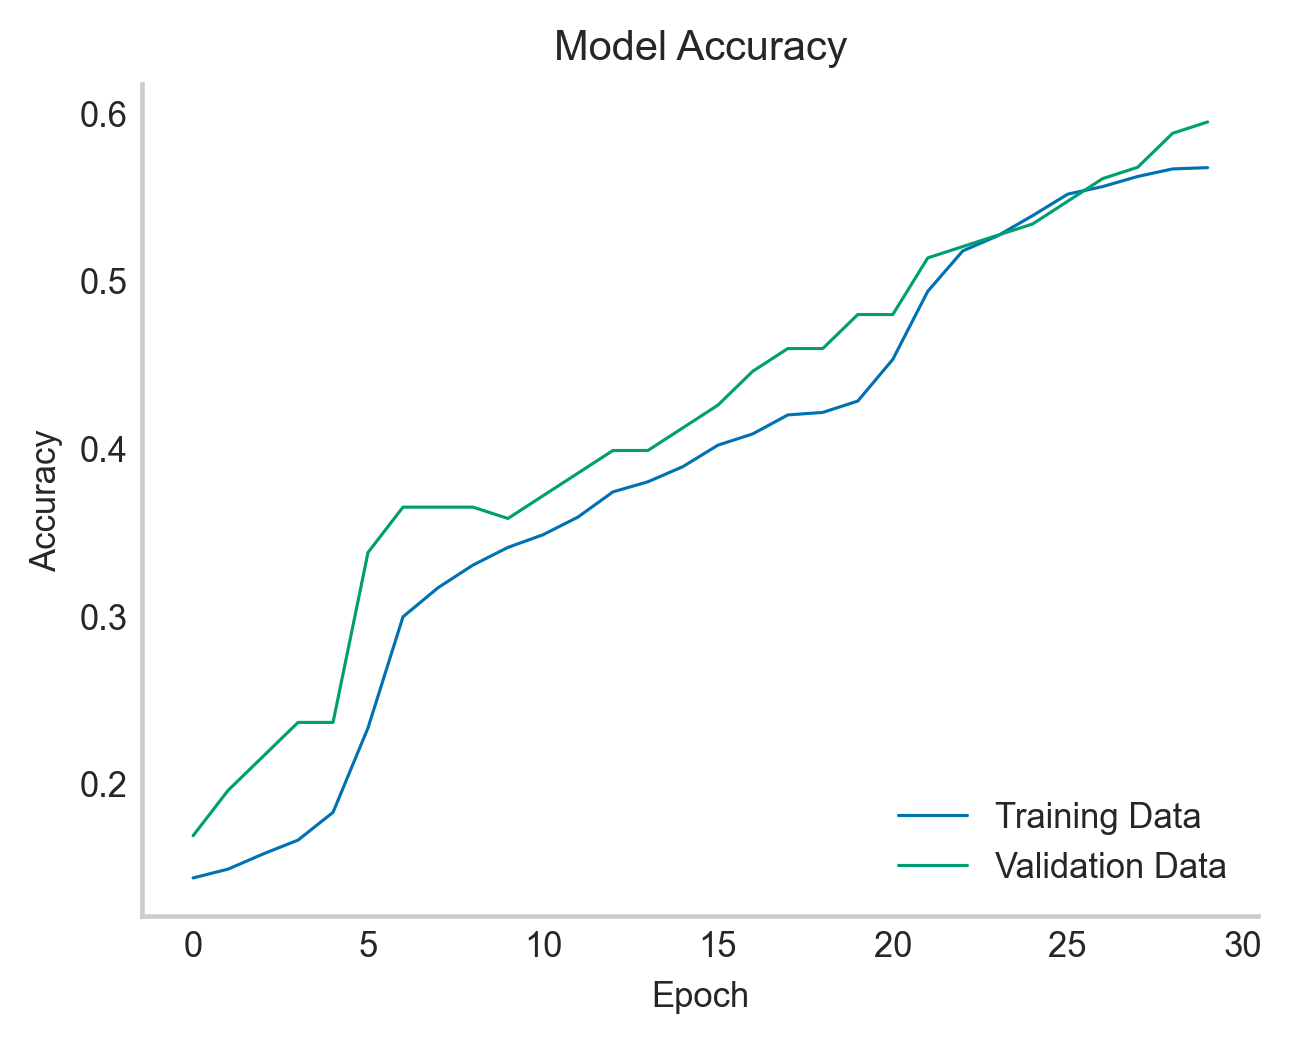

In [20]:
plt.plot(history.history["accuracy"], label="Training Data")
#adicionei esta linha debaixo
plt.plot(history.history["val_accuracy"], label="Validation Data")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.show()

In [21]:
#USEI CHATGPT
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Supondo que vocÃª jÃ¡ tenha treinado o modelo
# Fazendo previsÃµes no conjunto de teste
#y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculando a acurÃ¡cia
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.4f}')

# Calculando a sensibilidade (recall)
#sensitivity = recall_score(y_test, y_pred, average='macro')
#print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Calculando a especificidade
# A especificidade Ã© um pouco mais complexa, vamos calcular manualmente usando a matriz de confusÃ£o
#cm = confusion_matrix(y_test, y_pred)
#specificity = []
#for i in range(len(cm)):
#    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
#    fp = cm[:, i].sum() - cm[i, i]
#    specificity.append(tn / (tn + fp))
#specificity = np.mean(specificity)
#print(f'Specificity: {specificity:.4f}')

# Calculando o F1-Score
#f1 = f1_score(y_test, y_pred, average='macro')
#print(f'F1-Score: {f1:.4f}')

# RelatÃ³rio detalhado de classificaÃ§Ã£o
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))


In [22]:
# FunÃ§Ã£o para treinar e avaliar modelos TP2 MINDD
#def train_evaluate_model(model, name):

   # model.add(Dense(1))
    #model.compile(loss='mean_squared_error', optimizer='adam')

    #model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # PrevisÃµes
    #predictions = model.predict(X_test)

    #predictions = scaler.inverse_transform(predictions)

    #plt.plot(date_test, predictions, label=name)

    # AvaliaÃ§Ã£o do Modelo
    #mse = mean_squared_error(y_test, predictions)

    #print(f'{name} - MSE: {mse:.2f}')
    #print(f'{name} - RMSE: {sqrt(mse):.2f}')

    #print('-' * 50)
    
